# Heart Disease Data Analysis and Prediction
## Participants:
### Allen Daniel, Hardeep Gumber, Anvita Iyer, Krishan Pandey, Aleksandra Kutz

### Data Source:

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [365]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
from scipy.stats import linregress
from pathlib import Path
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from scipy.stats import chi2_contingency

In [25]:
#Import csv file

heart_disease_path = Path("heart_1.csv")
first_data_set = pd.read_csv(heart_disease_path)
first_data_set.head()

#Variables in this dataset
#[age] = age 
#[sex] = sex (1 = male; 0 = female)
#[cp]  =  chest pain type (4 values: 0 = Typical angina, 1 = Atypical angina, 2 = non-anginal pain, 3 = asymptomatic pain) 
#[trestbps] = resting blood pressure 
#[chol] = serum cholestoral in mg/dl  
#[fbs] = fasting blood sugar (1= > 120 mg/dl, 0=< 120 mg/dl)  
#[restecg] = resting electrocardiographic results (values 0,1,2)
#[thalach] = maximum heart rate achieved 
#[exang] = exercise induced angina (0 = no, 1= yes)
#[oldpeak] = oldpeak = ST depression induced by exercise relative to rest (bigger dip means higher risk of heart disease)
#[slope] = the slope of the peak exercise ST segment (0= downsloping = most ischemia, 1 = flat = moderate ischemia, 2 = upsloping = smaller ischemia) ischemia = process that occurs when flow of blood to an organ is restricted)
#[ca] = number of major vessels (0-3) colored by flourosopy: higher the number, more the blockage 
#[thal] = thal:thallium scintigraphy which tells how far the blood is travelling. 0 = normal; 1 = fixed defect; 2 = reversable defect 
#[target] = The presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,1
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,1


In [27]:
# Print the column headers
first_data_set.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [29]:
#Find duplicate rows
duplicates = first_data_set[first_data_set.duplicated()]

# Display the duplicate rows
duplicates

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,0
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,0
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,1
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,1
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,0
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,1
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,1
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,0


In [31]:
# Delete the duplicate rows
heart_disease_df = first_data_set.drop_duplicates(keep='last')
heart_disease_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
138,47,1,2,138,257,0,0,156,0,0.0,2,0,2,0
155,54,1,1,108,309,0,1,156,0,0.0,2,0,3,0
283,64,1,3,110,211,0,0,144,1,1.8,1,0,2,0
293,59,1,2,150,212,1,1,157,0,1.6,2,0,2,0
295,67,1,0,100,299,0,0,125,1,0.9,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,0
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,1
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,1
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,0


In [39]:
#Hypothesis#1
#Men are more likely to develop heart disease than women.

# Find the total number of women in the dataset
counts = heart_disease_df['sex'].value_counts()
all_women = counts.get(0, 0)  
print(f"Number of women: {all_women}")

# Find the total number of men in the dataset
counts = heart_disease_df['sex'].value_counts()
all_men = counts.get(1, 0)
print(f"Number of men: {all_men}")

#Filter the dataset to count number of women with heart disease (target =0)
filter_df = heart_disease_df[heart_disease_df['sex'] == 0 ]
count_ill_women = (filter_df['target'] == 1).sum()
print(f"Number of women with heart disease: {count_ill_women}")

filtered_df = heart_disease_df[heart_disease_df['sex'] == 1 ]
count_ill_men = (filtered_df['target'] == 1).sum()
print(f"Number of men with heart disease: {count_ill_men}")

Number of women: 96
Number of men: 206
Number of women with heart disease: 24
Number of men with heart disease: 114


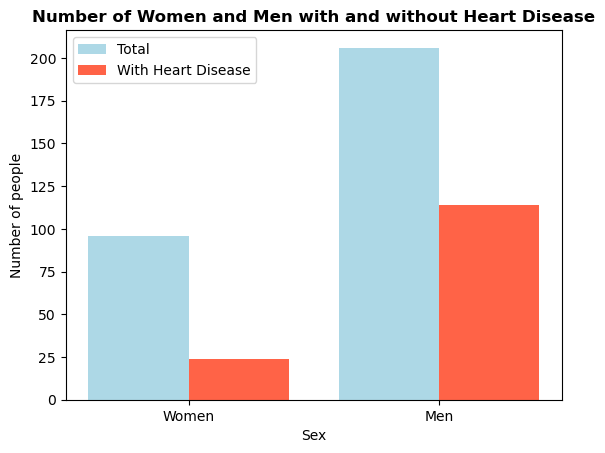

In [41]:
#Create a Bar chart (Target vs gender) to visualize the trend between gender and heart disease
categories = ['Women', 'Men']
total_counts = [all_women, all_men]
ill_counts = [count_ill_women, count_ill_men]

x = range(len(categories))

plt.bar(x, total_counts, width=0.4, label='Total', color='lightblue', align='center')
plt.bar([p + 0.4 for p in x], ill_counts, width=0.4, label='With Heart Disease', color='tomato', align='center')

plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.title('Number of Women and Men with and without Heart Disease', fontweight='bold')
plt.xticks([p + 0.2 for p in x], categories)
plt.legend()

plt.savefig("my_plot_gender_bar.png")
plt.show()

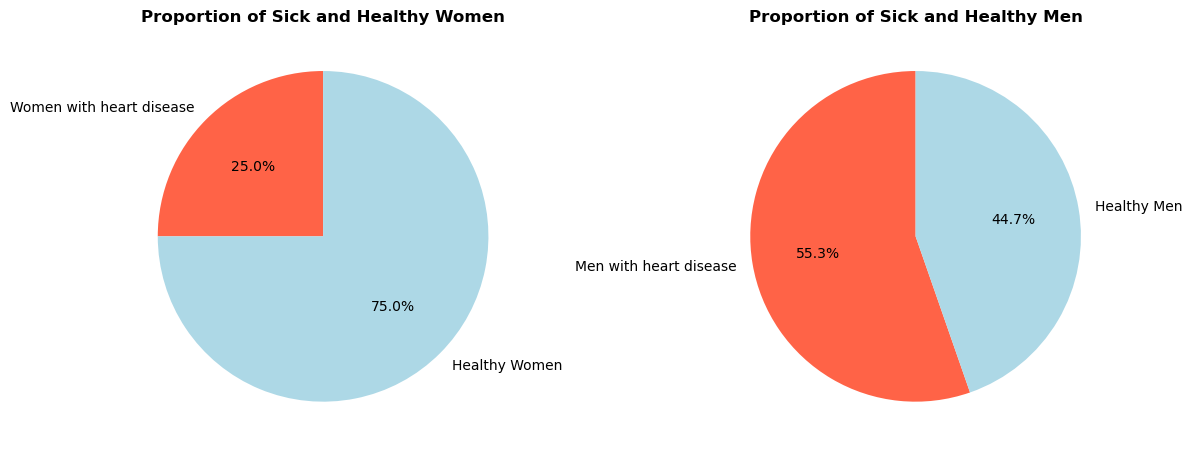

In [43]:
#Create a  pie chart to visualize the trend between gender and heart disease

ill_women = heart_disease_df[(heart_disease_df['sex'] == 0) & (heart_disease_df['target'] == 1)].shape[0]
healthy_women = all_women - ill_women

ill_men = heart_disease_df[(heart_disease_df['sex'] == 1) & (heart_disease_df['target'] == 1)].shape[0]
healthy_men = all_men - ill_men

plt.figure(figsize=(12, 6)) 

labels_women = ['Women with heart disease', 'Healthy Women']
sizes_women = [ill_women, healthy_women]
colors_women = ['tomato', 'lightblue']


plt.subplot(1, 2, 1)
plt.pie(sizes_women, labels=labels_women, colors=colors_women, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Sick and Healthy Women', fontweight='bold')

labels_men = ['Men with heart disease', 'Healthy Men']
sizes_men = [ill_men, healthy_men]
colors_men = ['tomato', 'lightblue']


plt.subplot(1, 2, 2)
plt.pie(sizes_men, labels=labels_men, colors=colors_men, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Sick and Healthy Men', fontweight='bold')

plt.tight_layout()

plt.savefig("my_plot_gender_pie.png")

plt.show()

In [45]:
#Using chi square to test the hypothesis that there is an association between gender and heart disease 

contingency_table1 = pd.crosstab(heart_disease_df['sex'], heart_disease_df['target'], 
                                  rownames=['Sex'], colnames=['Heart Disease'])

print(contingency_table1)

chi2, p, dof, expected = chi2_contingency(contingency_table1)

print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

alpha = 0.05 
if p < alpha:
    print("Reject the null hypothesis - there is a significant association between gender and heart disease.")
else:
    print("Fail to reject the null hypothesis - there is no significant association between gender and heart disease.")

Heart Disease   0    1
Sex                   
0              72   24
1              92  114
Chi-squared Statistic: 23.083879459669042
P-value: 1.5508552054949547e-06
Degrees of Freedom: 1
Expected Frequencies:
[[ 52.13245033  43.86754967]
 [111.86754967  94.13245033]]
Reject the null hypothesis - there is a significant association between gender and heart disease.


### Summary of hypothesis # 1
#### Yes, there is an association between gender and heart disease. 
#### Further, trends from the bar plot and pie charts indicate that Men are more likely to suffer from heart disease than women. 

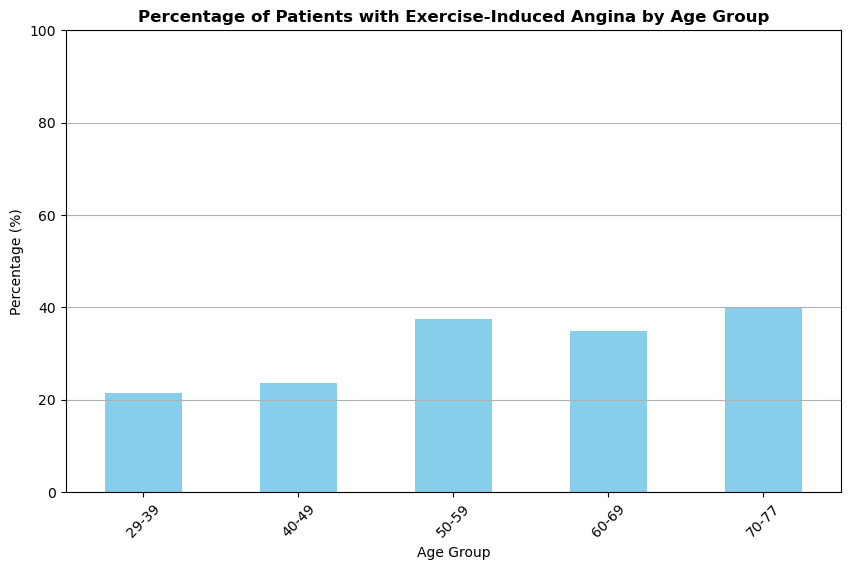

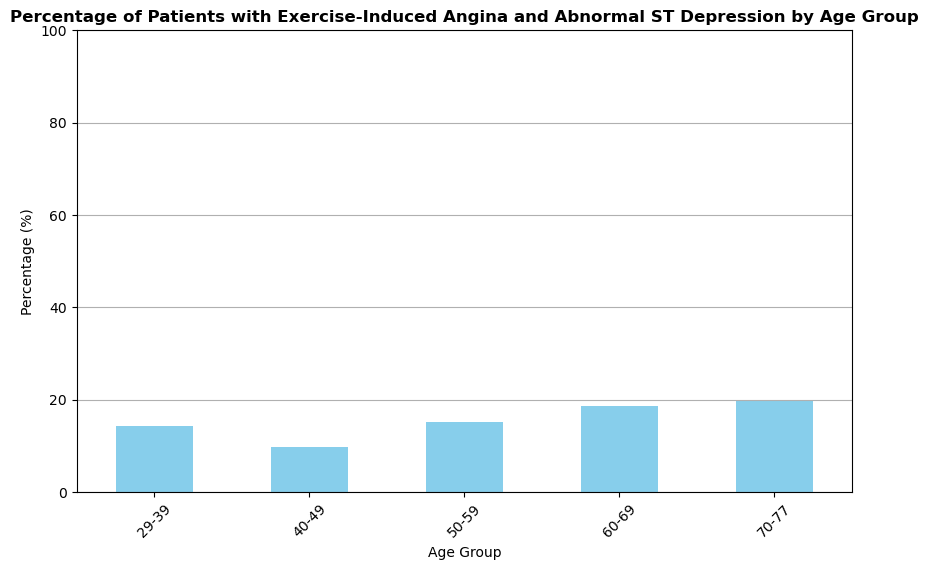

In [57]:
#Hypothesis#2 
#Older patients are more likely to have exercise-induced angina and abnormal ST depression levels.
#Note: ST segment depression may be determined by measuring the vertical distance between the patient's
#trace and the isoelectric line at a location 2-3 millimeters from the QRS complex. It is significant if it 
#is more than 1 mm in V5-V6, or 1.5 mm in AVF or III."-> from https://en.wikipedia.org/wiki/ST_depression#:~:text=the%20ECG%20paper.-,Measurement,mm%20in%20AVF%20or%20III.

#Divide age into 5 bins: 29-39, 40-49. 50-69, 60-69, 70-77
bins = [29, 39, 49, 59, 69, 77]
labels = ['29-39', '40-49', '50-59', '60-69', '70-77']
heart_disease_df.loc[:, 'age_group'] = pd.cut(heart_disease_df['age'], bins=bins, labels=labels, right=True)

#Bar Chart Exercise-Induced Angina across age groups --------------------------
#count of patients with angina
exang_df = heart_disease_df[heart_disease_df['exang'] == 1]

#group patients with angina into age bins
total_exang_count = exang_df.groupby('age_group', observed=True).size()

#count of total patients in each age bin
overall_count = heart_disease_df.groupby('age_group', observed=True).size()

#percentage of patients with angina in each age group
percentage_exang = (total_exang_count / overall_count) * 100

#Plot the bar chart
plt.figure(figsize=(10, 6))
percentage_exang.plot(kind='bar', color='skyblue')
plt.title('Percentage of Patients with Exercise-Induced Angina by Age Group', fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.savefig("my_plot_bar_Angina.png")
plt.show()

#-------------------------Bar Chart Exercise-Induced Angina and Oldpeak > 1.5 across age groups -----------

filt_df = heart_disease_df[(heart_disease_df['exang'] == 1) & (heart_disease_df['oldpeak'] > 1.5)]

double_diagnosis_count = filt_df.groupby('age_group', observed=True).size()
total_count = heart_disease_df.groupby('age_group', observed=True).size()

percentage_with_conditions = (double_diagnosis_count / total_count) * 100

plt.figure(figsize=(10, 6))
percentage_with_conditions.plot(kind='bar', color='skyblue')
plt.title('Percentage of Patients with Exercise-Induced Angina and Abnormal ST Depression by Age Group', fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.savefig("my_plot_bar_Angina_Oldpeak.png")
plt.show()

In [59]:
#Hypothesis#2
# Running the chi-squared test

contingency_table2 = pd.crosstab(heart_disease_df['age_group'], 
                                  (heart_disease_df['exang'] == 1) & (heart_disease_df['oldpeak'] > 1.5), 
                                  rownames=['Age Group'], 
                                  colnames=['Exercise-Induced Angina & Abnormal ST Depression'])

print("Contingency Table:\n", contingency_table2)

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table2)

print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

# Interpret the result
alpha = 0.05  # significance level
if p < alpha:
    print("Reject the null hypothesis - there is a significant association between age groups and exercise-induced angina with abnormal ST depression.")
else:
    print("Fail to reject the null hypothesis - there is no significant association between age groups and exercise-induced angina with abnormal ST depression.")

Contingency Table:
 Exercise-Induced Angina & Abnormal ST Depression  False  True 
Age Group                                                     
29-39                                                12      2
40-49                                                65      7
50-59                                               106     19
60-69                                                65     15
70-77                                                 8      2
Chi-squared Statistic: 2.6676574990354944
P-value: 0.6148858793384961
Degrees of Freedom: 4
Expected Frequencies:
[[ 11.90697674   2.09302326]
 [ 61.2358804   10.7641196 ]
 [106.31229236  18.68770764]
 [ 68.03986711  11.96013289]
 [  8.50498339   1.49501661]]
Fail to reject the null hypothesis - there is no significant association between age groups and exercise-induced angina with abnormal ST depression.


## Summary of Hypothesis # 2
### From the first barplot of this section, it is apparent that after 50 years of age, the probability of suffering from exercise induced angina increases. 
### There is no clear association between age groups and exercise-induced angina, in combination with ST depression. This results look contrary to expected. The population bins are not balanced as there is quite a wide range of the number of patients in each age group.


Number of patients with fasting blood sugar > 120 mg/dl: 45
Number of patients with fasting blood sugar > 120 mg/dl and heart disease: 22
Number of patients with fasting blood sugar <= 120 mg/dl: 257
Number of patients with fasting blood sugar <= 120 mg/dl and heart disease: 116


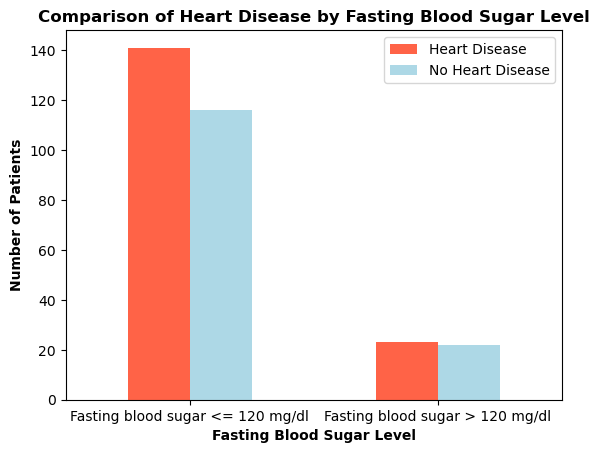

In [79]:
#Hypothesis#3 
#Patients with fasting blood sugar > 120 mg/dl are more likely to have heart disease

#--------- Checking patients with high sugar: -------------

high_sugar = heart_disease_df[heart_disease_df['fbs'] == 1 ]

total_high_sugar_patients = high_sugar.shape[0]
print(f"Number of patients with fasting blood sugar > 120 mg/dl: {total_high_sugar_patients}")

high_sugar_sick = (high_sugar['target'] == 1).sum()
high_sugar_healthy = (high_sugar['target'] == 0).sum()

print(f"Number of patients with fasting blood sugar > 120 mg/dl and heart disease: {high_sugar_sick}")

#--------- Checking control group: ------------

low_sugar = heart_disease_df[heart_disease_df['fbs'] == 0 ]

total_low_sugar_patients = low_sugar.shape[0]
print(f"Number of patients with fasting blood sugar <= 120 mg/dl: {total_low_sugar_patients}")

low_sugar_sick = (low_sugar['target'] == 1).sum()
low_sugar_healthy = (low_sugar['target'] == 0).sum()

print(f"Number of patients with fasting blood sugar <= 120 mg/dl and heart disease: {low_sugar_sick}")

#------------Chart bar ---------------------

summary = heart_disease_df.groupby(['fbs', 'target']).size().unstack(fill_value=0)

summary.plot(kind='bar', stacked=False, color=['tomato', 'lightblue'])
plt.xlabel('Fasting Blood Sugar Level', fontweight='bold')
plt.ylabel('Number of Patients', fontweight='bold')
plt.title('Comparison of Heart Disease by Fasting Blood Sugar Level', fontweight='bold')
plt.xticks(ticks=[0, 1], labels=['Fasting blood sugar <= 120 mg/dl', 'Fasting blood sugar > 120 mg/dl'], rotation=0)
plt.legend(['Heart Disease', 'No Heart Disease'])

plt.savefig("my_plot_sugar_bar.png")
plt.show()



In [81]:
#Hypothesis#3
# Run the chi-squared test

contingency_table3 = pd.crosstab(heart_disease_df['fbs'], heart_disease_df['target'], 
                                  rownames=['Fasting Blood Sugar'], colnames=['Heart Disease'])

print("Contingency Table:\n", contingency_table3)

chi2, p, dof, expected = chi2_contingency(contingency_table3)

print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

alpha = 0.05 
if p < alpha:
    print("Reject the null hypothesis - there is a significant association between fasting blood sugar levels and heart disease.")
else:
    print("Fail to reject the null hypothesis - there is no significant association between fasting blood sugar levels and heart disease.")
    
print("Expected Frequencies indicated there is not enough people in the test to be able to reject the null hypothesis")    

Contingency Table:
 Heart Disease          0    1
Fasting Blood Sugar          
0                    141  116
1                     23   22
Chi-squared Statistic: 0.09240835568001493
P-value: 0.7611374700928197
Degrees of Freedom: 1
Expected Frequencies:
[[139.56291391 117.43708609]
 [ 24.43708609  20.56291391]]
Fail to reject the null hypothesis - there is no significant association between fasting blood sugar levels and heart disease.
Expected Frequencies indicated there is not enough people in the test to be able to reject the null hypothesis


Hypothesis 4 (DANIEL ALLEN): The interaction between age, maximum heart rate achieved during exercise, and exercise-induced angina, along with the number of major vessels affected, significantly predicts the likelihood of chest pain (angina) in patients.

3D Surface Plot:
A 3D plot (e.g., age vs. thalach vs. probability of chest pain) to visually capture the interaction effect of age and thalach on the probability of chest pain.

Heatmap:
A heatmap showing the combined influence of exercise-induced angina (exang) and number of major vessels (ca) on the probability of chest pain would provide a more detailed view of the interaction effect.
    

In [84]:
# Load the dataset
import statsmodels.api as sm

data = pd.read_csv(r"heart_good_database.csv")
# Prepare the independent variables (X) and dependent variable (y)
X = data[['chol', 'thalach', 'fbs']]  # 'chol' = cholesterol, 'thalach' = max heart rate, 'fbs' = fasting blood sugar
y = data['target']  # 'target' represents heart disease (1 = presence, 0 = absence)
# Add a constant to the model (intercept)
X = sm.add_constant(X)
# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()
# Create a grid of values for 'chol' and 'thalach'
chol_vals = np.linspace(X['chol'].min(), X['chol'].max(), 100)
thalach_vals = np.linspace(X['thalach'].min(), X['thalach'].max(), 100)
chol_grid, thalach_grid = np.meshgrid(chol_vals, thalach_vals)
# Flatten the grids to use in prediction
chol_flat = chol_grid.ravel()
thalach_flat = thalach_grid.ravel()
# Keep fasting blood sugar constant (e.g., assume fasting blood sugar < 120, fbs = 0)
fbs_constant = np.zeros_like(chol_flat)
# Create a DataFrame for prediction
grid_data = pd.DataFrame({
    'const': 1,  # Add constant for intercept
    'chol': chol_flat,
    'thalach': thalach_flat,
    'fbs': fbs_constant  # Keep fbs constant for simplicity
})
# Predict the probability of heart disease
probs = result.predict(grid_data)
# Convert the probabilities to a NumPy array and reshape it to match the grid
probs_grid = np.array(probs).reshape(chol_grid.shape)
# Create the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot the surface
surf = ax.plot_surface(chol_grid, thalach_grid, probs_grid, cmap='viridis', edgecolor='k', alpha=0.7)
# Set axis labels
ax.set_xlabel('Cholesterol')
ax.set_ylabel('Max Heart Rate (Thalach)')
ax.set_zlabel('Predicted Probability of Heart Disease')
# Set the title
ax.set_title('3D Logistic Regression: Cholesterol vs Max Heart Rate vs Heart Disease')
# Add a color bar with a label
color_bar = fig.colorbar(surf, shrink=0.5, aspect=5)
color_bar.set_label('Predicted Probability')
# Adjust the viewing angle (elev=30, azim=45)
ax.view_init(elev=30, azim=45)  # Spin the plot by adjusting elevation and azimuth
# Show the plot
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'heart_good_database.csv'

Key Points from the 3D Surface Plot Discussion:

Overview:

The plot shows how age and maximum heart rate (thalach) interact to affect the probability of chest pain (angina).
Age as a Predictor:

Chest pain probability increases with age.
Older patients (60+ years) are at a higher risk compared to younger individuals.
Maximum Heart Rate (Thalach):

Higher heart rates, especially during physical exertion, increase the likelihood of chest pain, particularly in older patients.
Interaction Between Age and Thalach:

Younger patients can tolerate higher heart rates with less risk of chest pain.
Older patients face a steeper rise in chest pain risk with high heart rates.
Age and heart rate together give a more nuanced understanding of chest pain risk.
Non-Linearity:

The relationship is non-linear: chest pain risk increases sharply in some areas while remaining low in others (especially in younger or low heart rate cases).
Interpretation:

Younger patients: Low chest pain risk, even with high heart rates.
Older patients: Higher heart rates significantly raise chest pain risk.
Clinical Relevance:

Helps clinicians assess patient-specific risk and guide exercise recommendations.
Older patients may need to limit intense physical activity, while younger patients might have more flexibility.
Conclusion:

The plot highlights the interactive and non-linear effects of age and heart rate on chest pain risk, offering valuable insights for personalized cardiovascular risk assessments.
A heatmap to show how the combination of exercise-induced angina (exang) and the number of major vessels affected (ca) influences chest pain probability.

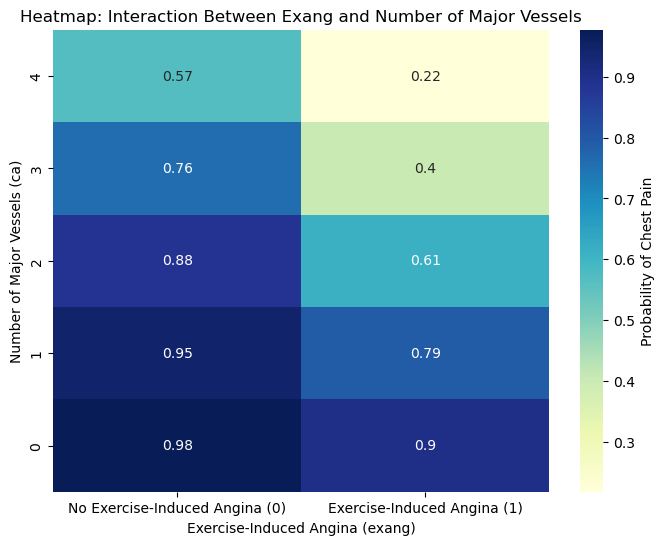

In [83]:
# Assuming 'logreg' and 'X' are defined elsewhere in the script.

# Create a grid of exang and ca values
exang_vals = [1, 0]  # 0 for No exercise-induced angina, 1 for Exercise-induced angina
ca_vals = np.arange(0, 5, 1)  # Number of major vessels can range from 0 to 4
exang_grid, ca_grid = np.meshgrid(exang_vals, ca_vals)

# Create a DataFrame for the grid of exang and ca values, keeping other features constant
grid_df = pd.DataFrame({
    'age': np.full_like(exang_grid.ravel(), X['age'].mean()),  # age = mean value as an example
    'thalach': np.full_like(exang_grid.ravel(), X['thalach'].mean()),  # thalach = mean value
    'exang': exang_grid.ravel(),
    'ca': ca_grid.ravel()
})

# Predict the probability of chest pain for each combination of exang and ca
probs = logreg.predict_proba(grid_df)[:, 1]

# Reshape predictions back to grid shape
probs_grid = probs.reshape(exang_grid.shape)

# Plot heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(probs_grid, annot=True, cmap="YlGnBu", xticklabels=['No Exercise-Induced Angina (0)', 'Exercise-Induced Angina (1)'], yticklabels=ca_vals[::-1])  # Reverse yticklabels to have 4 at the top and 0 at the bottom
plt.xlabel('Exercise-Induced Angina (exang)')
plt.ylabel('Number of Major Vessels (ca)')
plt.title('Heatmap: Interaction Between Exang and Number of Major Vessels')

# Add legend label
colorbar = heatmap.collections[0].colorbar
colorbar.set_label('Probability of Chest Pain')  # Adding label to the legend

plt.show()

Key Points from the Heatmap Discussion:

Overview:

The heatmap shows the interaction between exercise-induced angina (exang) and the number of major vessels (ca) affecting the probability of chest pain.
Key Observations:

General Trend:

Exercise-induced angina (exang = 1): Higher probability of chest pain across all vessel groups.
No exercise-induced angina (exang = 0): Lower probability of chest pain, indicating better cardiovascular stability under non-stress conditions.
Influence of Number of Major Vessels (ca):

More vessels affected (0 to 4): Increases chest pain probability for both groups.
4 vessels affected: Highest risk of chest pain (0.76 with exercise-induced angina).
Even without exercise-induced angina, the risk of chest pain rises significantly as the number of affected vessels increases.
Intermediate Groups (1-3 Vessels):

Exercise-induced angina: Still results in higher chest pain risk across all vessel groups.
Example: 3 vessels show a 0.59 probability with angina, compared to 0.21 without.
Clinical Interpretation:

Number of vessels and exercise-induced angina are key indicators of chest pain risk.
Higher vessel blockage combined with exercise-induced angina significantly raises chest pain probability.
Even without angina, having multiple blocked vessels is a strong predictor of chest pain.
Conclusion:

Both exercise-induced angina and the number of affected vessels are critical risk factors for chest pain.
Regular cardiovascular assessments are essential, especially for patients with multiple affected vessels or coronary artery disease.

In [ ]:
#Hypothesis#5 (KIRSHAN)
#Patients with a higher number of major vessels (colored by fluoroscopy) are less likely to have heart disease

group_counts = heart_disease_df.groupby(['ca', 'target']).size().reset_index(name='count')
# Display the result
print(group_counts)



<Figure size 1000x600 with 0 Axes>

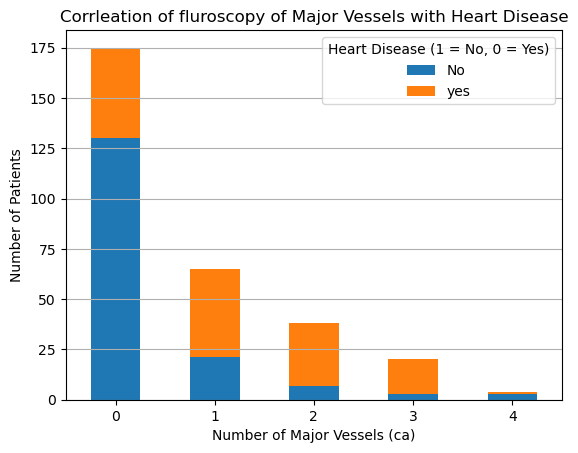

In [88]:
#Hypothesis#5
#Patients with a higher number of major vessels (colored by fluoroscopy) are more likely to have heart disease
# Pivot the DataFrame for easier plotting
pivot_counts = group_counts.pivot(index='ca', columns='target', values='count').fillna(0)

# Plotting
plt.figure(figsize=(10, 6))
pivot_counts.plot(kind='bar', stacked=True)

# Adding titles and labels
plt.title('Corrleation of fluroscopy of Major Vessels with Heart Disease')
plt.xlabel('Number of Major Vessels (ca)')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)  # Rotate x-ticks for better readability
plt.legend(title='Heart Disease (1 = No, 0 = Yes)', labels=['No', 'yes'])

#plt.legend(title='Heart Disease (0 = Yes, 1 = No)', labels=['Yes', 'No'])

plt.grid(axis='y')
plt.show()

In [89]:
# Create a contingency table
contingency_table = pd.crosstab(heart_disease_df['ca'], heart_disease_df['target'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# Interpretation of the result
alpha = 0.05  # significance level
if p < alpha:
    print("Reject the null hypothesis - there is a significant relationship between the number of blood vessels (ca) and heart disease.")
else:
    print("Fail to reject the null hypothesis - there is no significant relationship between the number of blood vessels (ca) and heart disease.")


Chi-Square Statistic: 73.68984583164412
P-Value: 3.771038067427659e-15
Degrees of Freedom: 4
Expected Frequencies Table:
[[95.03311258 79.96688742]
 [35.29801325 29.70198675]
 [20.63576159 17.36423841]
 [10.86092715  9.13907285]
 [ 2.17218543  1.82781457]]
Reject the null hypothesis - there is a significant relationship between the number of blood vessels (ca) and heart disease.


## Summary of Hypothesis#5
### Patients with a higher number of major blood vessels (colored by fluoroscopy) are more likely to have heart disease.
### Fluoroscopy visualizes calcification (blockage) of arteries. A higher number of calcified vessels means, higher blockage. 
### In this hypotheis testing, the result is that there is an association with calcified blood vessels and heart disease. The trend from the graph shows that higher the number of calcified blood vessels, higher the likelihood of heart disease.

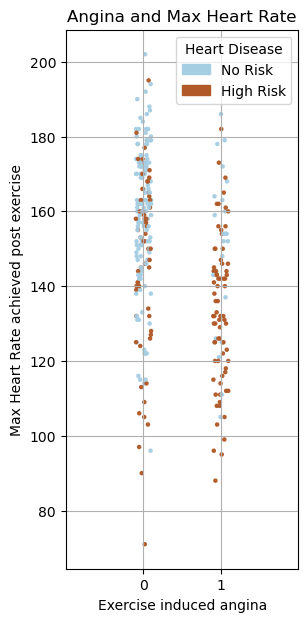

In [417]:
## Hypothesis#6 

#Patients with a higher maximum heart rate achieved during exercise and exercise induced angina are less likely to have heart disease.
#[thalach] = maximum heart rate achieved 
#[exang] = exercise induced angina (0 = no, 1= yes)
hr_angina_df = heart_disease_df[['thalach', 'exang', 'target']]
hr_angina_df


# Create a dot plot
color = hr_angina_df['target']

plt.figure(figsize=(3, 7))
jittered_values_exang = hr_angina_df['exang'] + np.random.uniform(-0.1, 0.1, size=len(hr_angina_df))

scatter = plt.scatter(jittered_values_exang, hr_angina_df['thalach'], c=color, s=5, cmap='Paired',alpha=0.95)
plt.xticks([0, 1])
plt.xlim(-1.0, 2.0)
plt.title('Angina and Max Heart Rate')
plt.xlabel('Exercise induced angina')
plt.ylabel('Max Heart Rate achieved post exercise')

# Add legend
# Create custom legend handles and labels
legend_labels = ['No Risk', 'High Risk']
colors = [scatter.cmap(scatter.norm(value)) for value in [0.0, 1.0]]
handles = [mpatches.Patch(color=colors[i], label=legend_labels[i]) for i in range(len(legend_labels))]

plt.legend(handles=handles, title="Heart Disease", loc='upper right')
plt.grid()
plt.show()

## Sumamry for Hypotheris#6
### Higher maximum heart rate is achieved in participants with no chest pain. 
### Majority of patients with chest pain are not able to achieve higher max heart rate.
### Majority of patients with chest pain are at a higher risk for heart disease.


Correlation between age and trestbps: 0.283120678980804


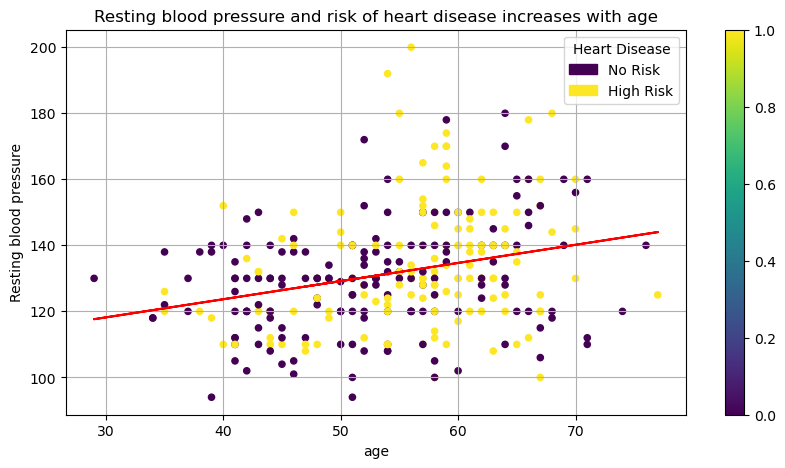

In [415]:
#Hypothesis
#What is a better predictor of heart disease: Resting bp or the maximum heart rate achieved during exercise
#Expectation: Higher the Max heart during rate achieved during exercise in an age group, lower the heart disease
#Expectation: Higher the resting bp, higher the chances of heart disease
#Make a scatter plot of age gp vs resting bp, add corelation on it
# Make a line chart of age gp vs max heart rate achieved, add corelation on it

correlation = heart_disease_df['age'].corr(heart_disease_df['trestbps'])
print(f'Correlation between age and trestbps: {correlation}')

color = hr_angina_df['target']
cmap = plt.get_cmap('viridis')

scatter = heart_disease_df.plot(x='age', y ='trestbps', kind = 'scatter', c=color, cmap=cmap, figsize = (10,5))
# Adding a correlation line
slope, intercept = np.polyfit(heart_disease_df['age'], heart_disease_df['trestbps'], 1)
regression_line = slope * heart_disease_df['age'] + intercept
plt.plot(heart_disease_df['age'], regression_line, color='red', label='Correlation Line')
plt.title('Resting blood pressure and risk of heart disease increases with age')
plt.xlabel('age')
plt.ylabel('Resting blood pressure')
plt.grid()

legend_labels = ['No Risk', 'High Risk']
colors = [cmap(value) for value in [0.0, 1.0]]
handles = [mpatches.Patch(color=colors[i], label=legend_labels[i]) for i in range(len(legend_labels))]

plt.legend(handles=handles, title="Heart Disease", loc='upper right')

plt.show()

## Resting blood pressure, age and heart disease Plot Summary 

### With age, the the resting bp increases and the chances of heart disease also increase

Correlation between age and max heart rate achieved: -0.3952351875534803


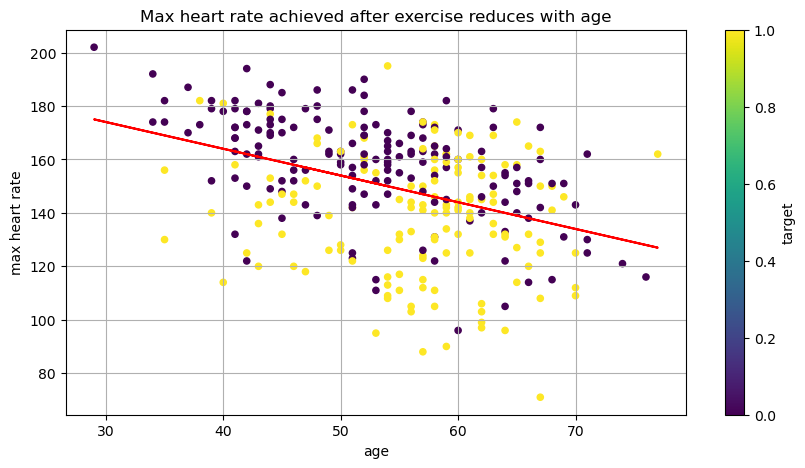

In [123]:
# Make a line chart of age  vs max heart rate achieved, add corelation on it
#heart_disease_df

#[thalach] = maximum heart rate achieved

correlation = heart_disease_df['age'].corr(heart_disease_df['thalach'])
print(f'Correlation between age and max heart rate achieved: {correlation}')
heart_disease_df.plot(x='age', y ='thalach', kind = 'scatter', c='target', colormap='viridis', figsize = (10,5))
# Adding a correlation line
slope, intercept = np.polyfit(heart_disease_df['age'], heart_disease_df['thalach'], 1)
regression_line = slope * heart_disease_df['age'] + intercept
plt.plot(heart_disease_df['age'], regression_line, color='red', label='Correlation Line')
plt.title('Max heart rate achieved after exercise reduces with age')
plt.xlabel('age')
plt.ylabel('max heart rate')
plt.grid()
plt.show()

## Maximum heart rate, age and heart disease Plot Summary 

### With age, the ability to achieve maximum heart rate post exercise decreases and the chances of heart disease increases

In [121]:
# corelations between variables

correlation1 = heart_disease_df['age'].corr(heart_disease_df['target'])
print(f'Correlation between age and heart disease: {correlation1}')

correlation2 = heart_disease_df['sex'].corr(heart_disease_df['target'])
print(f'Correlation between sex and heart disease: {correlation2}')

correlation3 = heart_disease_df['trestbps'].corr(heart_disease_df['target'])
print(f'Correlation between the resting bp and heart disease: {correlation3}')

correlation4 = heart_disease_df['chol'].corr(heart_disease_df['target'])
print(f'Correlation between the serum cholesterol and heart disease: {correlation4}')

correlation5 = heart_disease_df['fbs'].corr(heart_disease_df['target'])
print(f'Correlation between the fasting blood sugar and heart disease: {correlation5}')

correlation6 = heart_disease_df['thalach'].corr(heart_disease_df['target'])
print(f'Correlation between the maximum heart rate achieved and heart disease: {correlation6}')

correlation7 = heart_disease_df['exang'].corr(heart_disease_df['target'])
print(f'Correlation between the exercise induced angina and heart disease: {correlation7}')

correlation8 = heart_disease_df['oldpeak'].corr(heart_disease_df['target'])
print(f'Correlation between the ST depression and heart disease: {correlation8}')

correlation9 = heart_disease_df['ca'].corr(heart_disease_df['target'])
print(f'Correlation between the blockage of major blood vessels and heart disease: {correlation9}')


Correlation between age and heart disease: 0.22147582776656227
Correlation between sex and heart disease: 0.28360935779586244
Correlation between the resting bp and heart disease: 0.14626866384155446
Correlation between the serum cholesterol and heart disease: 0.08143720051844142
Correlation between the fasting blood sugar and heart disease: 0.026825970565970303
Correlation between the maximum heart rate achieved and heart disease: -0.41995504366387004
Correlation between the exercise induced angina and heart disease: 0.43560076171361883
Correlation between the ST depression and heart disease: 0.42914583288673863
Correlation between the blockage of major blood vessels and heart disease: 0.40899197975692675


C:\Users\hargu\AppData\Local\Temp\ipykernel_27220\862509439.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease_sub_df.rename(columns={'age': 'Age', 'sex': 'Sex', 'trestbps' : 'Rest BP', 'chol': 'Chol', 'fbs': "Sugar", 'thalach' : "Max HR",


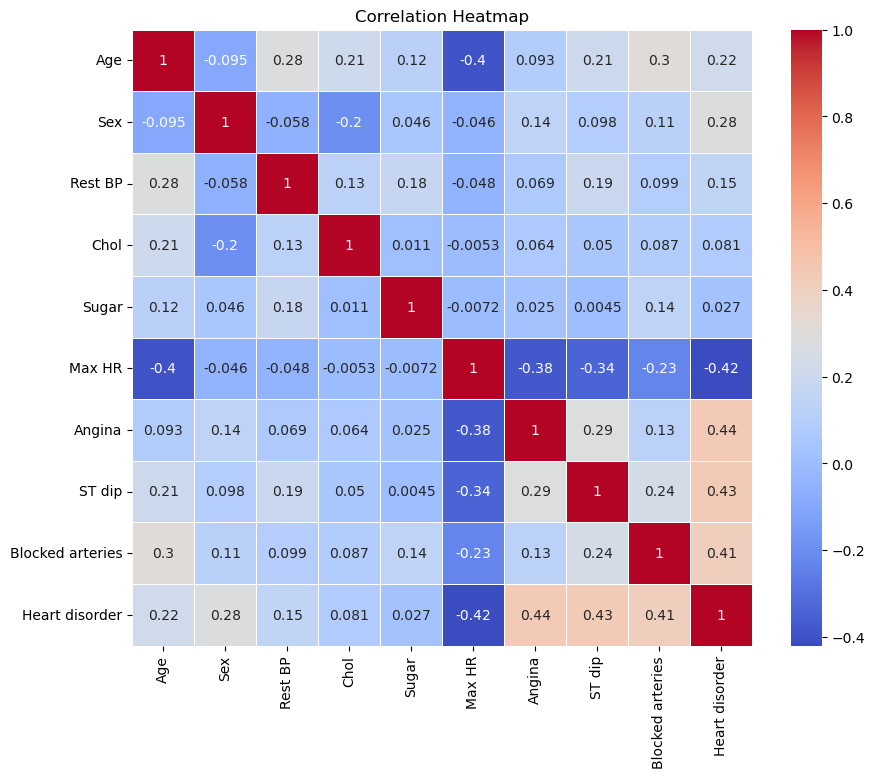

In [160]:
#create heatmap of ordered variables
heart_disease_sub_df= heart_disease_df[['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach','exang', 'oldpeak', 'ca', 'target']]
heart_disease_sub_df

# Rename columns
heart_disease_sub_df.rename(columns={'age': 'Age', 'sex': 'Sex', 'trestbps' : 'Rest BP', 'chol': 'Chol', 'fbs': "Sugar", 'thalach' : "Max HR", 
                   'exang': "Angina", 'oldpeak' : 'ST dip', 'ca': 'Blocked arteries', 'target': "Heart disorder"}, inplace=True)

# Calculate the correlation matrix
corr_matrix = heart_disease_sub_df.corr()
corr_matrix

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the heatmap
plt.title('Correlation Heatmap')
plt.show()


## Summary of correlations among different variables from the above heatmap

### This heatmap summarizes the correlations between various variables used in this study. 
### There is a strong positive corelation between chest pain, abnormal ST curve on ECG and number of blocked blood vessels,
### We also noticed that there is a strong negative corelation between Maximum heart rate achieved after exercise. People who are able to achieve a higher heart rate after exercise have better working hearts and are less likely to  develop heart disorder.
### There were other positive coreelation patterns observed between heart disease and variables such as, Age. As we grow older, we are more likely to suffer from heart disease. Especially after 50 years of age. 
### Sex of a person has also been seen to play a role where men are more likely to suffer from heart disease than women

## Limitations of this study and analysis
### Although we are able to find trends and correlations between health factors. There were certain limitations in the dataset that prevented us from drawing statistically significant corelations due to certain data set limitations. Such as: 
### The dataset got quite reduces after the clean up process. A large amount of data was duplicated. 
### Data set was also imbalance for certain variables, such as, age, sex and fasting blood sugar levels. 
### Therefore, Our analysis does not necessarily reflect the interdependencies between all variables that collectively increase the likelihood of heart disease.
### In addition, heart disease is largely impacted by lifestyle choices, such as race, diet, eating habits, sleeping habits, workout routines etc, that are not included in this study. 
